# Proyecto Regresión Logística:

In [113]:
# Librería para la declaración y uso de Data Frames:
import pandas as pd

# Librería para poder codificar las variables categóricas:
from sklearn.preprocessing import LabelEncoder

# Librería para poder realizar la partición del conjunto de datos:
from sklearn.model_selection import train_test_split

# Librería para generar un modelo XGBoost:
import xgboost as xgb

# Librería para calcular el VIF: 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Librería para realizar operaciones matemáticas: 
import numpy as np

# Librería para visualizar datos estadísticos: 
import seaborn as sns

# Librería para utilizar un escalador normalizado: 
from sklearn.preprocessing import MinMaxScaler

## Paso 1 - Lectura de Datos:

En primer lugar, es necesario **leer y guardar la información** en una variable para poder empezar a trabajar con ella.

Para ello, se ha guaradado el archivo con todos los datos en la ruta: */workspaces/logistic-regression-clara-ab/data/raw/bank-marketing-campaign-data.csv* y se ha cargado en un Data Frame:

In [94]:
# Lectura del CSV con los datos, dada la ruta donde se guarda el archivo (se ha evitado cargar la primera columna con los índices de las filas):
df = pd.read_csv ('/workspaces/logistic-regression-clara-ab/data/raw/bank-marketing-campaign-data.csv', sep = ";").iloc[:,1:]

# Configuración de pandas para mostrar todas las columnas del DataFrame sin truncarlas al visualizarlo
pd.set_option('display.max_columns', None)

# Se muestran las 5 primeras filas del Data Frame
df.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Una vez se ha cargado correctamente la información en el Data Frame df es interesante evaluar la **cantidad de información que se tiene**. Para ello, se recurre al atributo shape del Data Frame:

In [95]:
# Se utiliza el atributo shape del Data Frame para conocer cuánta información está cargada:
print(f" El archivo cargado contiene {df.shape[0]} clientes, con un total de {df.shape[1]} datos sobre ellos"); 

 El archivo cargado contiene 41188 clientes, con un total de 20 datos sobre ellos


Además, tal y como se ha visto en el **breve resumen** mostrado a partir de `.head()` la variable que será catalogada más adelante como **variable dependiente/objetivo** (`y`) tiene dos valores `yes` y `no`. En este caso, lo que interesa es **predecir si un cliente contratará o no un depósito a largo plazo**, es decir, interesa detectar el `yes`. 

Por este motivo, se va a **realizar un cambio**, por el cual, en todas las filas donde en la columna `y` haya un `yes` se convertirá a `1` y donde haya un `no`se convertirá a `0` 

In [96]:
# Se codifica la columna objetivo:
df['y'] = df['y'].map({"yes": 1, "no": 0});

# Se comprueba que se ha codificado correctamente: 
df.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


Ahora que ya se han cargado los datos y se tiene información sobre los mismos, se ha de proceder a realizar un **filtrado de los datos realmente relevantes para el análisis**.

## Paso 2 - Análisis Exploratorio de Datos:

Antes de realizar un estudio del modelo de tipo Regresión Logística, es fundamental lelvar a cabo un análisis de los datos para poder identificar **patrones**, detectar **valores atípicos**. y evaluar la **distribución** de las variables para comprender la **relación** entre ellas. 

Por este motivo, se van a realizar distintos pasos cuyo objetivo final es **preparar el conjunto de datos** para poder trabajar con ellos. Este EDA no se explicará tan en detalle como en el proyecto anterior, y solo se darán conclusiones a los resultados obtenidos. 

### Paso 2.1 - Análisis de Constantes y Duplicados:

In [97]:
# Se utiliza el método .nunique() para saber la cantidad de columnas con constantes en el Data Frame:
print(f" Hay un total de {(lambda df: (df.nunique() == 1).sum())(df)} columnas en el Data Frame con un valor constante para todos los clientes");


# Se imprime el conteo de valores distintos en cada columna:
print (f" \nPara cada columna del Data Frame, se muestran cuántos valores distintos presentan:");
df.nunique()

 Hay un total de 0 columnas en el Data Frame con un valor constante para todos los clientes
 
Para cada columna del Data Frame, se muestran cuántos valores distintos presentan:


job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

A partir del resultado obtenido, se puede observar que **no hay ninguna constante en los datos cargados**, por lo tanto, no hay que eliminar ninguna columna, de momento.

In [98]:
# Se utiliza el método .duplicated() para identificar los clientes repetidos dentro del DataFrame:
print(f" Hay un total de {df.duplicated().sum()} clientes duplicados.");

 Hay un total de 49 clientes duplicados.


Se han detectado un total de **49 clientes duplicados** que se han de eliminar:

In [99]:
# Se eliminan las filas duplicadas:
df_clean = df.drop_duplicates();

# Se utiliza el método .duplicated() para identificar los clientes repetidos dentro del DataFrame:
print(f" Hay un total de {df.duplicated().sum()} clientes duplicados.");

 Hay un total de 49 clientes duplicados.


### Paso 2.2 - Análisis Estadístico:

In [100]:
# Descripción estadística básica de todas las columnas del DataFrame:
df_clean.describe(include='all').T # Se traspone para ver de forma más clara los datos

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
job,41139,12,admin.,10399,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,41139,4,married,24891,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,41139,8,university.degree,12151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,41139,3,no,32547,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,41139,3,yes,21554,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,41139,3,no,33904,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,41139,2,cellular,26113,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,41139,10,may,13753,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,41139,5,thu,8611,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,41139.0,NaN,NaN,NaN,258.430832,259.385089,0.0,102.0,180.0,319.0,4918.0


En este caso, **se busca información estadística que no sea coherente**. Sin embargo, en este caso, **no llama la atención ningún dato en concreto** por lo que no se va a relizar ningún filtrado a través de este análisis. 

### Paso 2.3 - Análisis de Nulos:

In [101]:
# Se comprueba el porcentaje de clientes que presentan al menos un valor nulo:
print(f" El {round(df_clean.isnull().any(axis=1).mean()*100, 2)} % de los clientes presenta, al menos, un valor nulo en alguna de sus características descriptivas");

 El 0.0 % de los clientes presenta, al menos, un valor nulo en alguna de sus características descriptivas


**No hay ningún nulo** en el conjunto de datos. 

### Paso 2.4 - Codificación de Variables Categóricas:

En el conjunto de datos con el que se está trabajando, la **mayoría de las variables son de tipo categórico**. Sin embargo, para **poder trabajar con ellas** en algoritmos de *Machine Learning*, es necesario **codificarlas** para que sean variables de tipo numérico. 

En primer lugar, se va a mostrar un **resumen únicamente de este tipo de variables** para poder analizar de qué forma se peude realizar la codificación: 

In [102]:
# Descripción estadística básica de todas las columnas del DataFrame:
df_clean.describe(include='object').T # Se traspone para ver de forma más clara los datos

,count,unique,top,freq
job,41139,12,admin.,10399
marital,41139,4,married,24891
education,41139,8,university.degree,12151
default,41139,3,no,32547
housing,41139,3,yes,21554
loan,41139,3,no,33904
contact,41139,2,cellular,26113
month,41139,10,may,13753
day_of_week,41139,5,thu,8611
poutcome,41139,3,nonexistent,35514


Al ser varias variables y algunas tener bastantes posibles valores, se va a a utilizar una instancia de la clase `LabelEncoder`. 

El único problema que surge en este caso es que, como se ha de realizar la **codificación sobre varias columnas**, es necesario trabajar con el LabelEncoder de forma que no *recuerde* la información del caso anterior. Una opción para ello es **declarar tantos LabelEncoders como variables se tiene** pero se tienen demasiadas variables como para hacerlo a mano. Por este motivo, se va a generar una **lista con el nombre de todas las columnas de variables categóricas** y se va a declarar un **diccionario para guardar los encoder** dentro de un bucle que recorra cada una de dichas columnas. 

In [103]:
# Se declara una lista con el nombre de todas las columnas categóricas:
categorical_cols = df_clean.select_dtypes(include=["object"]).columns.tolist();


# Se declara un diccionario para guardar los LabelEncoders
encoders = {};

# Se genera un LabelEncoder por cada columna y se aplica:
for column in categorical_cols:
    encoders[column] = LabelEncoder();
    df_clean[column] = encoders[column].fit_transform(df_clean[column]);

# Se comprueba que la codificación se ha realizado correctamente:
# Se comprueba que si hay columnas categóricas:
try:
    # Se intenta obtener el resumen de las columnas categóricas
    print(df_clean.describe(include = 'object')).T;

except Exception:
    # Si hay un error, es porque no hay columnas categóricas:
    print("No hay variables categóricas en el conjunto de datos.");

No hay variables categóricas en el conjunto de datos.


/tmp/ipykernel_2164/3906681983.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[column] = encoders[column].fit_transform(df_clean[column]);
/tmp/ipykernel_2164/3906681983.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[column] = encoders[column].fit_transform(df_clean[column]);
/tmp/ipykernel_2164/3906681983.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

### Paso 2.5 - Análisis de Características Relevantes:

Continuando con el proceso de preparación y compresión del conjunto de datos que implica un Análisis Exploratorio, se va a realizar una **Selección de Características**.

Para ello, se va a utilizar un modelo de regresión basado en **XGBoost**, un algoritmo basado en árboles de decisión que utiliza boosting para mejorar la precisión. Por este motivo, el primer paso ha de ser separar el conjunto de datos teniendo una partición para entrenar al modelo (*train*) y otro para probarlo (*test*), de forma que se pueda evaluar sin inferir en el modelo su capacidad predictiva.

In [104]:
# Se separa la variable dependiente: 
y = df_clean ['y'];

# Se guardan las variables independientes en una matrix, eliminando las características relacionadas con la dependiente:
X = df_clean.drop(['y'], axis = 1);

# Se realiza la partición, explicitando el tamaño del test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42);

# Se crea un modelo de regresión XGBoost y se entrena con los datos del 'train_set':
xgb_model = xgb.XGBClassifier(objective = 'binary:logistic', random_state = 42).fit(X_train, y_train);

Una vez se tiene el modelo entrenado, se va a generar un DataFrame que contenga el **nombre cada característica y su importancia** en valor porcentual:

In [105]:
# Se extrae la importancia de cada característica en porcentaje y se guarda en un Data Frame:
df_imp = pd.DataFrame({'Feature':X_train.columns, 'Importance':xgb_model.feature_importances_*100});

# Se ordena el Data Frame en orden de mayor a menor importancia:
df_imp = df_imp.sort_values(by='Importance', ascending=False);

# Se muestra el Data Frame de las características y su importancia: 
df_imp

,Feature,Importance
18,nr.employed,72.863197
9,duration,4.445392
16,cons.conf.idx,3.638501
11,pdays,2.442244
14,emp.var.rate,2.189091
7,month,1.787626
3,default,1.652054
6,contact,1.614220
17,euribor3m,1.410226
13,poutcome,1.230565


Hay una característica cuya **importancia destaca sobre cualquiera** de las otras: El indicador trimestral del **número de empleados**, `nr.employed`. 

Por otro lado, se pueden encontrar características cuya **importancia no llega al 1%** y que, por lo tanto, se van a descartar:

In [106]:
# Se establece un punto de corte: 
cut_point_characteristics = 1;

# Se seleccionan las características con más de 1% de importancia:
X_train = X_train[df_imp[df_imp.Importance>cut_point_characteristics]['Feature'].values];
X_test = X_test[df_imp[df_imp.Importance>cut_point_characteristics]['Feature'].values];

### Paso 2.6 - Análisis del VIF:

Para continuar con el Análisis Exploratorio de los Datos, se va proceder a utilizar una métrica para **detectar la colinealidad entre las variables independientes**, el factor de Inflación de Varianza (**VIF**), pudiendo así saber si una variable puede predecirse de manera lineal usando otras variables y **evitar redundancias** en el conjunto de datos.

In [107]:
# Se calcula el VIF utilizando la función variance_inflation_factor de cada una de las características del conjunto de datos:
vif = pd.Series([variance_inflation_factor(X_train.corr().values, i) for i in range(X_train.corr().shape[1])], index=X_train.columns);
vif

nr.employed       15451.590659
duration              1.074355
cons.conf.idx       375.541312
pdays                 7.305764
emp.var.rate      12645.529557
month               102.312340
default               1.816240
contact              58.103591
euribor3m         49496.078931
poutcome              4.752806
cons.price.idx     1318.878433
day_of_week           1.084707
dtype: float64

La forma correcta de interpretar un VIF es la siguiente:

- **VIF** = 1 : No hay colinealidad

- 1 < **VIF** < 5 : Colinealidad Moderada

- **VIF** > 5 : Colinealidad Alta

En este caso, es evidente ver que hay variables cuyo **VIF es exageradamente alto** y que, además, algunas son de las **variables más importantes** detectadas. 

Sin embargo, también hay **variables con VIF alta pero cuya importancia no ha llegado al 2%**, por lo que se va a realizar un **segundo filtrado** por importancia en el intento de reducir esta colinealidad:

In [108]:
# Se establece un  nuevo punto de corte: 
cut_point_characteristics = 2;

# Se seleccionan las características con más de 2% de importancia:
X_train = X_train[df_imp[df_imp.Importance>cut_point_characteristics]['Feature'].values];
X_test = X_test[df_imp[df_imp.Importance>cut_point_characteristics]['Feature'].values];

# Se vuelve a evaluar el VIF:
vif = pd.Series([variance_inflation_factor(X_train.corr().values, i) for i in range(X_train.corr().shape[1])], index=X_train.columns);
vif

nr.employed      143.191072
duration           1.027134
cons.conf.idx      1.803285
pdays              2.780917
emp.var.rate     133.782192
dtype: float64

Como se puede comprobar, el **VIF ha bajado muy considerablemente** aunque todavía hay dos valores especialmente altos. Para poder ver más en profundidad la **relación entre las variables**, se va a obtener el **mapa de color de la matriz de correlación**:

<Axes: >

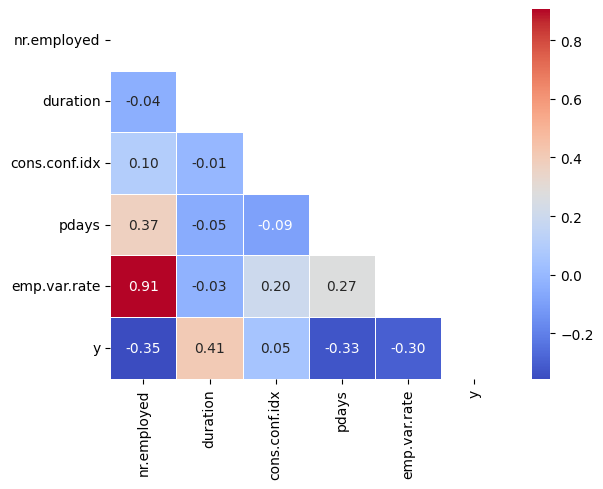

In [111]:
# Se hace una copia del train set:
X_corr = X_train.copy();

# Se añade la columna de precios:
X_corr['y'] = y_train;

# Se calcula la matrix de correlación entre todas las columnas:
corr = X_corr.corr();

# Se crea el mapa de color:
mask = np.triu(np.ones_like(corr, dtype=bool));
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

Gracias al mapa de color se puede ver la **relación existente** entre la variable `emp.var.rate`  y  `nr.employed`. Teniendo en cuenta que el indicador trimestral relativo al **número de empleados** es la variable **más importante** y el relativo a la tasa de **variación de empleo** supera por poco el **2% de importancia**, se decide simplemente **eliminarla** del conjunto de entrenamiento y del de prueba, en lugar de generar *Interaction Terms.* 

In [112]:
# Se elimina la característica `emp.var.rate` de ambas particiones:
X_train = X_train.drop(['emp.var.rate'], axis = 1);
X_test = X_test.drop(['emp.var.rate'], axis = 1);

## Paso 3 - Escalado de Variables:

Ahora que ya se cuenta con la información relevante para poder utilizar el modelo, hay que asegurarse que todos los **datos contribuyen de manera equitativa**. 

Para ello, es necesario realizar un escalado habiendo elegido para este caso un **escalado normalizado** (rango de 0 a 1). Por este motivo, se va a utilizar una instancia de la clase `MinMaxScaler()`: 

In [114]:
# Se instancia un escalador normalizado y se ajusta con los datos de entrenamiento:
scaler = MinMaxScaler().fit(X_train);

# Se escalan los datos y se vuelven a guardar en un Data Frame: 
X_train_sc = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns);
X_test_sc = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns);